# Numerisk laboration II: Bayesiansk inferens för parameterestimering

## Bayesiansk inferens och maskininlärning [TIF385], Chalmers, lp2 4

Senast uppdaterad:2-Dec-2024 av Christian Forssén [christian.forssen@chalmers.se]

## Instruktioner

- Se deadline för examination på kurshemsidan.
- Denna numeriska laboration examineras genom individuellt godkänt på obligatoriska uppgifter i Yata, samt genom godkänd redovisning av lösningar och resultat vid en gruppdiskussion som leds av övningsledare.
- Laborationen genomförs individuellt men redovisning sker i seminarieform med flera studenter åt gången.
- Diskussioner och samarbete mellan studenter är tillåtet, men varje student som deltar i en redovisning måste på egen hand kunna svara på frågor kring lösning och tolkning av samtliga delar av laborationen.

### Resultat och figurer
- Vid gruppredovisningen skall varje student vara beredd att köra sin lösningskod och kunna demonstrera resultat via efterfrågade figurer.
- Alla figurer skall vara tydliga att avläsa, med rubriker på axlar och en beskrivning av kurvor och/eller data.
- Ni skall kunna tolka era resultat och förklara hur dessa genererades.

## Uppgift

Det övergripande målet är att reproducera några resultat från den vetenskapliga artikeln: [*Bayesian parameter estimation for effective field theories*](https://arxiv.org/abs/1511.03618) av Sarah Wesolowski et al.  

Detta är en lång artikel med en ganska detaljerad guide till användandet av Bayesiansk inferens inom fysikalisk modellering, och speciellt när man använder så kallade effektiva fältteorier. Vi kommer enbart att fokusera på en liten del inom Sec. II och ni behöver alltså inte läsa artikeln.

I artikeln introduceras en enkel domänbegränsad modell, nämligen Taylorutvecklingen av en trigonometrisk funktion, för att simulera egenskaper hos en effektiv fältteori. Situationen motsvarar att man har en övergripande fysikalisk förståelse för sin modell, men saknar detaljerad kunskap (eller förmåga) att beskriva fysiken vid höga energiskalor. En effektiv teori är en systematisk beskrivning av fysik på givna längd- eller energi-skalor med en modell som enbart innehåller de frihetsgrader som är mest relevanta. Man undviker därmed att explicit inkludera komplicerad fysik på kortare längdskalor (eller högre energi). Istället sammanfattas deras effekt genom systematiskt härledda termer med styrkor som ges av så kallade lågenergikonstanter. Värdena på dessa är dock obekanta.

I vårt fall representerar (det obekanta) sambandet
$$
y(x) = \left(\frac12 + \tan\left(\frac{\pi}{2}x\right)\right)^2
$$
den underliggande teorin som vi alltså inte känner till. Vi vill enbart försöka beskriva sambandet för små värden på $x$ där vi inser att en enkel linjär modell är en god approximation. Även om modellparametrarna inte är kända så förväntar vi oss att samtliga är av "naturlig storlek", dvs av storleksordningen 1 (och inte 10, 100, osv). Vi förväntar oss också att de kan vara både positiva och negativa.

Vår effektiva modell är alltså linjär
$$
M(\boldsymbol{\theta};x) = \sum_{i=0}^k \theta_i x^i,
$$
där $\theta_i$ är våra modellparametrar och parameterdimensionen är $N_p = k+1$ där $k$ är graden på polynomet.

Målet är att estimera parametrarna $\theta_i$ för olika modelltrunkeringar $k$ (vilket motsvarar att bestämma $N_p = k+1$ parametrar). Vi skall använda både linjär och Bayesiansk regression och analysera resultaten.

Mer specifikt så utförs uppgiften i tre steg (plus förberedelse) som beskrivs närmare nedan:

* Steg 0: Förberedelse
* **Steg 1: Linjär regression**
* **Steg 2: Bayesiansk inferens**
* **Steg 3: MCMC sampling och a posteriori förutsägelser**

### Lärandemål
- Att kunna välja och använda relevanta metoder för att utföra en modell- och dataanalys.
- Mer specifikt; 
  - att tillämpa numeriska metoder för att utföra linjär regression och Bayesiansk inferens.
  - att utföra numeriska matrisoperationer för att få resultat (vilket möjliggörs genom att betrakta en linjär modell med analytiska uttryck för de relevanta sannolikhetsfördelningarna).
  - att tillämpa den mer kraftfulla numeriska metoden MCMC sampling för att genomföra en dataanalys för ett exempel där det är möjligt att validera de numeriska resultaten.
- Tolka resultat i termer av mängden och precisionen på tillgänglig data, samt a priori kunskaper.
- Skapa och presentera vetenskapligt komponerade figurer och kunna beskriva dessa.

## Steg 0: Förberedelse

Denna förberedelse rekommenderas för att kunna utföra och förstå uppgifterna nedan samt att kunna tolka resultaten. Förhoppningsvis känner ni igen flera delar från övningar, demonstrationer och föreläsningar. 
- Läs de relevanta avsnitten i kurskompendiet. Speciellt **linjär regression (kap. 8)** samt **Bayesiansk linjär regression (kap. 18)**, men även repetitionen av relevanta koncept i matematisk statistik (kap. 6) och avsnitt **15.2 om Bayes teorem**. 
- Studera speciellt uppvärmningsexemplen från linjär regression i kapitel 8 (uppgifterna 8.1 och 8.2) samt Bayesiansk linjär regression i kapitel 18 (uppgifterna 18.2, 18.3, och 18.4). Ni har antagligen kod för linjär regression från räkneövningar och demonstrationer under de första två läsveckorna. Detta exempel går även att lösa med penna och papper.

Detta förberedelsesteg examineras inte explicit i laborationen (men förståelsen av innehållet testas i den skriftliga tentamen). 

## Examinerade uppgifter. 

Uppgiftsbeskrivningar finns längre ner i detta dokument. Förslag på tillvägagångssätt:

### Steg 1 och 2
* Gör först **förberedelseuppgift 1 på Yata** (vilken inkluderar **uppgift 18.1**).
* Följ de specifika instruktionerna nedan för att ladda ner samma data som användes i artikeln: [D1_c_5.dat](https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat). 
  - De tre kolumnerna motsvarar den oberoende parametern $x_j$, motsvarande uppmätta respons $d_j$ samt standardavvikelsen på det experimentella felet $\sigma_j$ för tio mätningar ($j=1, \ldots, 10$).
  - Vi kommer dock att utföra en analys där vi *antar* att den experimentella osäkerheten för samtliga mätpunkter karakteriseras av en normalfördelning med standardavvikelse $\sigma_\epsilon = 0.05$. Vi skall alltså inte använda den tredje kolumnen.
* Följ instruktionerna stegvis. Titta på kodexempel i förläsningsanteckningarna för ledtrådar.
* Definiera funktioner för den linjära modellen och för den datagenererande funktionen så att det går att rita upp dessa i figurer. Använd ett tätare intervall av punkter i $x$-led för detta, men håll er till intervallet $x \in [0, 0.4]$.
* Starta med en modell med ett lågordningspolynom och öka ordningen när ni är säkra på resultaten.

### Steg 3: MCMC sampling
* Gör först **förberedelseuppgift 2 på Yata**.
* Utveckla och testa er samplingsfunktion i Yata innan ni använder den i uppgiften.
* Skapa funktioner för logaritmen av a priori- och trolighetsfördelningarna. Notera att logaritmen av (den onormaliserade) a posteriorifördelningen då är summan av dessa. Ni behöver inte inkludera normaliseringskonstanter som inte beror på de parametrar som ni försöker estimera.
* För att spara ner figurer kan funktionen `savefig` i `matplotlib.pyplot` vara användbar.
* Glöm inte axelrubriker och symbolförklaring ("legend") i figurerna.

### modulimport

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

### Nedladdning av data

Det bifogade materialet till atikeln arXiv:1511.03618 inkluderar den datafil som vi skall använda. Vi kan använda `pandas` för att läsa denna från en url.

In [2]:

# Let's read the data using pandas.
url = "https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat"
names = ['x', 'd', 'sigma']
# Note that the data file uses one or more tabs as separators. So the regex '\t+' is needed
# and this calls for engine='python'
# Comment lines starting with '#' should be ignored
pd_D = pd.read_csv(url, names=names, sep='\t+', engine='python', comment='#')
print(f'Read data from {url} into a pandas data frame with shape: {pd_D.shape}')
display(pd_D)
x = pd_D['x'].to_numpy()
d = pd_D['d'].to_numpy()
sigma = pd_D['x'].to_numpy()
print(x)
print(d)

Read data from https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat into a pandas data frame with shape: (10, 3)


,x,d,sigma
0,0.03183,0.31694,0.015850
1,0.06366,0.33844,0.016920
2,0.09549,0.42142,0.021070
3,0.12732,0.57709,0.028850
4,0.15915,0.56218,0.028110
5,0.19099,0.68851,0.034430
6,0.22282,0.73625,0.036810
7,0.25465,0.87270,0.043640
8,0.28648,1.00150,0.050075
9,0.31831,1.06840,0.053420


[0.03183 0.06366 0.09549 0.12732 0.15915 0.19099 0.22282 0.25465 0.28648
 0.31831]
[0.31694 0.33844 0.42142 0.57709 0.56218 0.68851 0.73625 0.8727  1.0015
 1.0684 ]


In [3]:
# Taylorutveckling av den datagenererande funktionen
# g(x) = 0.25 + 1.57x + 2.47x**2 + 1.29x**3
theta_true = np.array([0.25, 1.5707963, 2.4674011, 1.2919282, 4.0587121,
                       1.275082, 5.67486677])

## Steg 1: Linjär regression

Studera gärna uppvärmningsexemplet från linjär regression i kapitel 8 (uppgifterna 8.1 och 8.2). Ni har antagligen kod för linjär regression från räkneövningar och demonstrationer under de första två läsveckorna. Detta exempel går även att lösa med penna och papper.

(a) Examineras i Yata.

   Utför linjär regression på denna data för modeller med $k \in \{ 0, 1, 2, 3, 4, 5\}$. 

(b) Figur 1:

   Jämför data, exakt funktion samt de olika linjära modeller som anpassades i deluppgift 1(a).
   - Vad händer med modellen som har sex paramterar?

## Steg 2: Bayesiansk inferens

Studera gärna uppvärmningsexemplet från Bayesiansk linjär regression i kapitel 18 (uppgifterna 18.2, 18.3, och 18.4). 

Gör **förberedelseuppgift 1 på Yata** (vilken inkluderar **uppgift 18.1**.

- Antag en (oberoende) normal a priori fördelning i alla parameterriktningar med medelvärdet $\mu_\theta=0$ samt standardavvikelse $\sigma_\theta=5.0$.
- Vidare antar vi oberoende och identiskt normalfördelade experimentella fel med medelvärdet $\mu_\epsilon=0$ samt standardavvikelse $\sigma_\epsilon = 0.05$.

(a)  Tabell 1:

   Gör bayesiansk inferens enligt ovan antaganden för $k \in \{0, 1, 2, 3, 4, 5\}$. Redovisa medelvärden samt standardavvikelse för de marginaliserade parameterfördelningarna för samtliga sex inferensproblem. 
   - Jämför med koefficienterna för Taylorutvecklingen av den underliggande funktionen. 
   - Jämför med resultaten från linjär regression ovan och tolka skillnaden.

(b) Figur 2:

   Fokusera på inferensen med ett tredjegradspolynom ($k=3$). Redovisa i fyra paneler de marginaliserade fördelningarna för det fyra parametrarna. I varje panel skall ni jämföra a priori- och a posteriori-fördelningarna samt även visa trolighetsfunktionen som en funktion av respektive parameter. 
   - Tolka dessa resultat.

## Steg 3: MCMC sampling och a posteriori förutsägelser

Målet med detta sista steg är att genomföra den Bayesianska inferensen helt numeriskt. 

(a) Examineras i Yata

- Skapa en MCMC-sampler som bygger på Metropolisalgoritmen och som använder en normalfördelning för att föreslå nya positioner i ett $N_p$-dimensionellt rum.
- Definiera funktioner för logaritmen av a priori fördelningen samt för logaritmen av trolighetsfunktionen som tar en parameteruppsättning som argument. Ni behöver inte inkludera normaliseringskonstanter som inte beror på de parametrar som ni försöker estimera. 
- Definiera slutligen en funktion som beräknar logaritmen av (den onormaliserade) a posteriorifördelningen. 

(b) Figur 3:

Utför en MCMC sampling av a posteriorifördelningen för den kvadratiska modellen (med tre parametrar). Visa följande marginalfördelningar, gärna i en så kallad "corner plot":

Bivariata
-  $p(\theta_0,\theta_1 \vert \mathcal{D}, I)$
-  $p(\theta_0,\theta_2 \vert \mathcal{D}, I)$
-  $p(\theta_1,\theta_2 \vert \mathcal{D}, I)$

Univariata
-  $p(\theta_0 \vert \mathcal{D}, I)$
-  $p(\theta_1 \vert \mathcal{D}, I)$
-  $p(\theta_2 \vert \mathcal{D}, I)$

Undersök hur kvaliten på dessa samplade fördelningar beror på antalet iterationer samt på bredden på normalfördelningen som används för att föreslå nya positioner. Jämför på egend hand (dessa undersökningar behöver ej redovisas i den inlämnade ipynb-filen men kan diskuteras på redovisningsseminariet):
- Hur väl jämför medelvärden och varianser med den analytiska lösningen?
- Kvaliteten på samplingen måste vara tillräckligt hög för att (åtminstone) de univariata normaldistributionerna skall kunna urskiljas.

(c) Figur 4:

Välj cirka 100 stickprov ur den samplade fördelningen och gör en förutsägelse av funktionens utseende i intervallet $x \in [0, 0.4]$. Jämför med data samt på den underliggande funktionen. Försök dra slutsatser kring följande (dessa undersökningar behöver ej redovisas i den inlämnade ipynb-filen men kan diskuteras på redovisningsseminariet):
- Var är osäkerheten i förutsägelserna som störst?
- Med målet att den ändliga mängden med stickprov bäst skall representera den riktiga fördelningen av a posteriori förutsägelser, är det bäst att välja stickprov som kommer efter varandra i samplingen eller är det bättre att sprida ut dem?

## Steg 1

In [4]:
class LinearRegression:
    def __init__(self, xdata, ydata, polynomial_order):
        self.xdata = np.array(xdata).reshape(-1, 1)
        self.ydata = np.array(ydata).reshape(-1, 1)
        self.polynomial_order = polynomial_order
        self.theta = np.random.uniform(size=polynomial_order+1)

    def create_polynomial_design_matrix(self, xdata):
        """
        Create a design matrix for a polynomial model, and return it.
        """
        ### BEGIN SOLUTION
        xdata = np.array(xdata).reshape(-1,1)
        design_matrix = np.ones_like(xdata)
        for deg in range(1, self.polynomial_order+1):
            design_matrix = np.hstack((design_matrix, xdata**deg))
        return design_matrix
        ### END SOLUTION

    def predict(self, xpred):
        """
        Perform a prediction, y_pred = X_pred \theta.
        Let the students try this one!
        """
        ### BEGIN SOLUTION
        Xpred = self.create_polynomial_design_matrix(xpred)
        ypred = np.matmul(Xpred, self.theta)
        return ypred
        ### END SOLUTION

    def solve_normal_equation(self):
        """
        Solves the normal equation and updates the parameters theta.
        """
        ### BEGIN SOLUTION
        X = self.create_polynomial_design_matrix(self.xdata)
        # matrix-matrix and matrix-vector operations
        XTX = np.matmul(X.T, X)
        XTy = np.matmul(X.T, self.ydata)
        # pseudoinverse
        XTXinv = np.linalg.inv(XTX)
        # solution of the normal equation
        theta = np.matmul(XTXinv,XTy)
        self.theta = theta.flatten()
        ### END SOLUTION

    def gradient(self):
        """
        Computes the cost function gradient with regards to the model parameters.
        """
        ### BEGIN SOLUTION
        N = len(self.xdata)
        design_matrix = self.create_polynomial_design_matrix(self.xdata)
        Xtheta = np.matmul(design_matrix, self.theta.reshape(-1,1))
        grad_theta = -2 / N * np.matmul(design_matrix.T, self.ydata - Xtheta)
        return grad_theta.flatten()
        ### END SOLUTION

    def optimize(self, iterations, learning_rate):
        """
        Optimizes the parameters using gradient descent.
        """
        ### BEGIN SOLUTION
        self.history = []
        for iter in range(iterations):
            grad_theta = self.gradient()
            self.theta = self.theta - learning_rate * grad_theta
            self.history.append(self.theta)
        ### END SOLUTION

Degree: 0 - theta [0.658343]
Degree: 1 - theta [0.18285983 2.71596033]
Degree: 2 - theta [0.24577724 1.7276393  2.8226453 ]
Degree: 3 - theta [0.24519042 1.74399066 2.71126595 0.21206631]
Degree: 4 - theta [  0.24068338   1.92552307   0.62446143   9.17047094 -12.79260385]
Degree: 5 - theta [ 5.73270056e-01 -1.52989340e+01  2.84692911e+02 -1.98603053e+03
  6.21757778e+03 -7.11757626e+03]


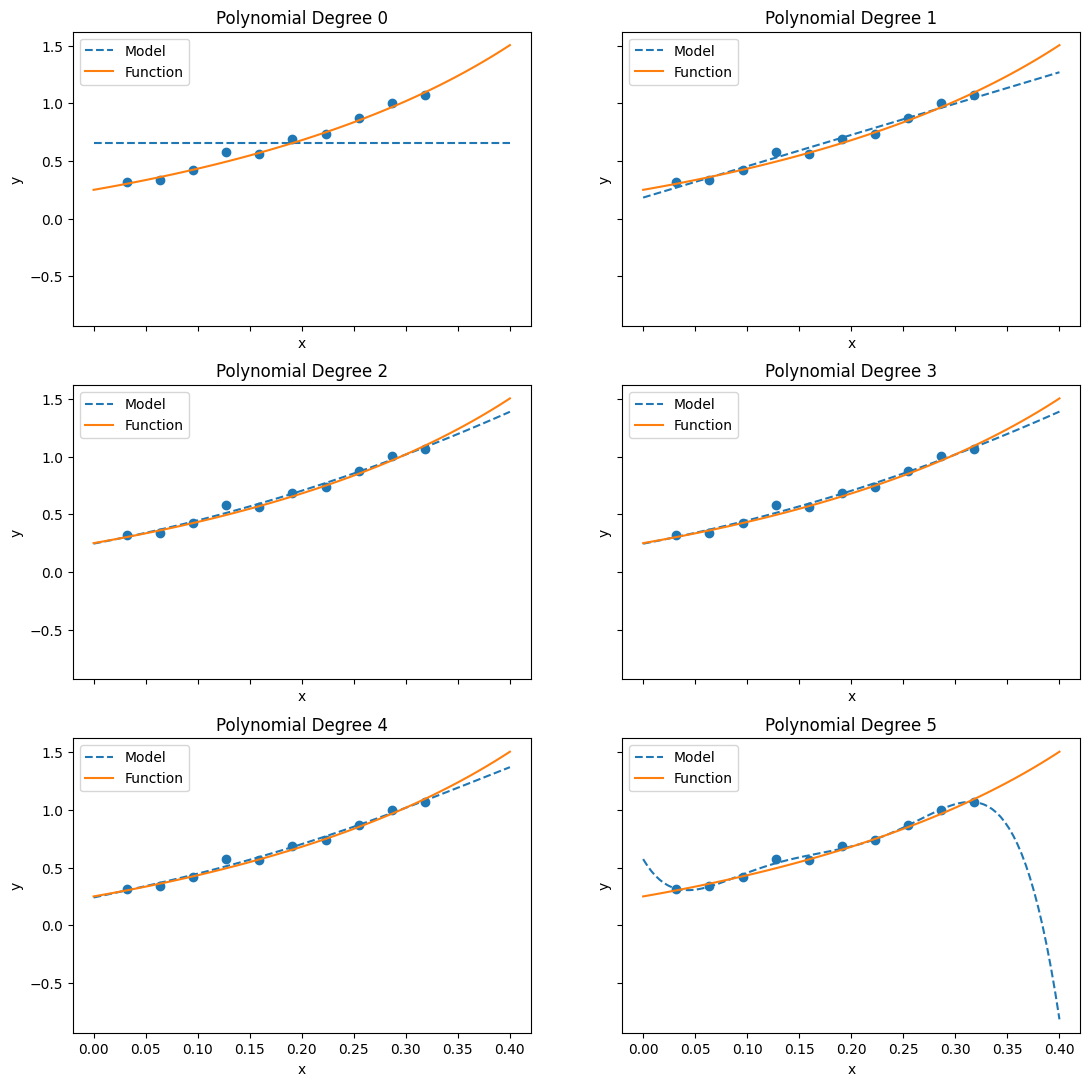

In [16]:
xpred = np.linspace(0, 0.4, 100)


fig, axs = plt.subplots(nrows=3, ncols=2, sharey=True, sharex=True, figsize=(13,13))

Theata_values = {}

for k in range(6):
    ax = axs.flatten()[k]
    Model = LinearRegression(x, d, k)
    Model.solve_normal_equation()
    ypred = Model.predict(xpred=xpred)
    ax.plot(xpred, ypred, linestyle='--', label= 'Model')
    ax.plot(xpred, (1/2 + np.tan(np.pi * xpred / 2))**2, label = 'Function')
    ax.set_title(f"Polynomial Degree {k}")
    ax.scatter(x, d)
    Theata_values[k] = Model.theta
    print(f"Degree: {k} - theta {Model.theta}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.plot()




In [6]:
#När det är 6 parametrar blir modellen väldigt överanpassad, exempelvis blir koefficienterna i polynomet väldigt stora

for i in range(6):
    print("Medelvärdet av abslolutbeloppet av koefficienterna för grad {} är {}".format(i, np.mean(abs(Theata_values[i]))))

Medelvärdet av abslolutbeloppet av koefficienterna för grad 0 är 0.658343
Medelvärdet av abslolutbeloppet av koefficienterna för grad 1 är 1.449410076783556
Medelvärdet av abslolutbeloppet av koefficienterna för grad 2 är 1.5986872800078065
Medelvärdet av abslolutbeloppet av koefficienterna för grad 3 är 1.228128336236523
Medelvärdet av abslolutbeloppet av koefficienterna för grad 4 är 4.95074853112869
Medelvärdet av abslolutbeloppet av koefficienterna för grad 5 är 2603.6249473869707


## Steg 2

In [7]:


sigma_theta = 5**2
sigma_epsilon = 0.05**2

def setup_polynomial_design_matrix(data, poldeg):
    data = np.array(data).reshape(-1)
    design_matrix = np.vander(data, poldeg+1, increasing = True)
    return design_matrix


def solve_normal_equation(X, D):
    XTX = X.T @ X
    XTXinv = np.linalg.inv(XTX)
    XTD = X.T @ D
    theta_star = XTXinv @ XTD
    return theta_star.flatten()


def sigma_inv(X, sigma_epsilon_sq):
    return (X.T @ X) / sigma_epsilon_sq

def sigma_tilde_inv(X, sigma_epsilon_sq, sigma_theta_sq):
    return sigma_inv(X, sigma_epsilon_sq) + 1/sigma_theta_sq*np.eye(X.shape[1])

def theta_tilde(theta_star, X, sigma_epsilon_sq, sigma_theta_sq):
    siginv = sigma_inv(X, sigma_epsilon_sq)
    
    sigtildeinv = sigma_tilde_inv(X, sigma_epsilon_sq, sigma_theta_sq)
    sigtilde = np.linalg.inv(sigtildeinv)
    
    return sigtilde @ siginv @ theta_star

results_mean = {}
results_cov = {}

for k in range(6):
    design_M = setup_polynomial_design_matrix(x, k)
    theta_star = solve_normal_equation(design_M, d)

    thetatilde = theta_tilde(theta_star, design_M, sigma_epsilon, sigma_theta)
    sigtildeinv = sigma_tilde_inv(design_M, sigma_epsilon, sigma_theta)
    sigmatilde = np.linalg.inv(sigtildeinv)


    
    print("Medelvärde för parametrar= {}".format(thetatilde))
    print("Standardavvikelse för parametrar= {}".format(np.sqrt([sigmatilde[j,j] for j in range(k+1)])))
    print("Avvikelse från sant värde= {}  ".format(thetatilde-theta_true[:(k+1)]))
    print("Avvikelse från linjär regression= {}  \n".format(thetatilde-Theata_values[k]))
    results_mean[k] = thetatilde
    results_cov[k] = sigmatilde

    




Medelvärde för parametrar= [0.65833642]
Standardavvikelse för parametrar= [0.01581131]
Avvikelse från sant värde= [0.40833642]  
Avvikelse från linjär regression= [-6.58336417e-06]  

Medelvärde för parametrar= [0.1834194  2.71275354]
Standardavvikelse för parametrar= [0.03413916 0.17282961]
Avvikelse från sant värde= [-0.0665806   1.14195724]  
Avvikelse från linjär regression= [ 0.00055958 -0.00320679]  

Medelvärde för parametrar= [0.23857652 1.84448647 2.48277064]
Standardavvikelse för parametrar= [0.05523738 0.70508547 1.95465336]
Avvikelse från sant värde= [-0.01142348  0.27369017  0.01536954]  
Avvikelse från linjär regression= [-0.00720072  0.11684716 -0.33987466]  

Medelvärde för parametrar= [0.23776837 1.88830776 2.07607381 0.92260524]
Standardavvikelse för parametrar= [0.05537422 0.73596808 2.76656909 4.44148128]
Avvikelse från sant värde= [-0.01223163  0.31751146 -0.39132729 -0.36932296]  
Avvikelse från linjär regression= [-0.00742205  0.14431709 -0.63519214  0.71053893] 

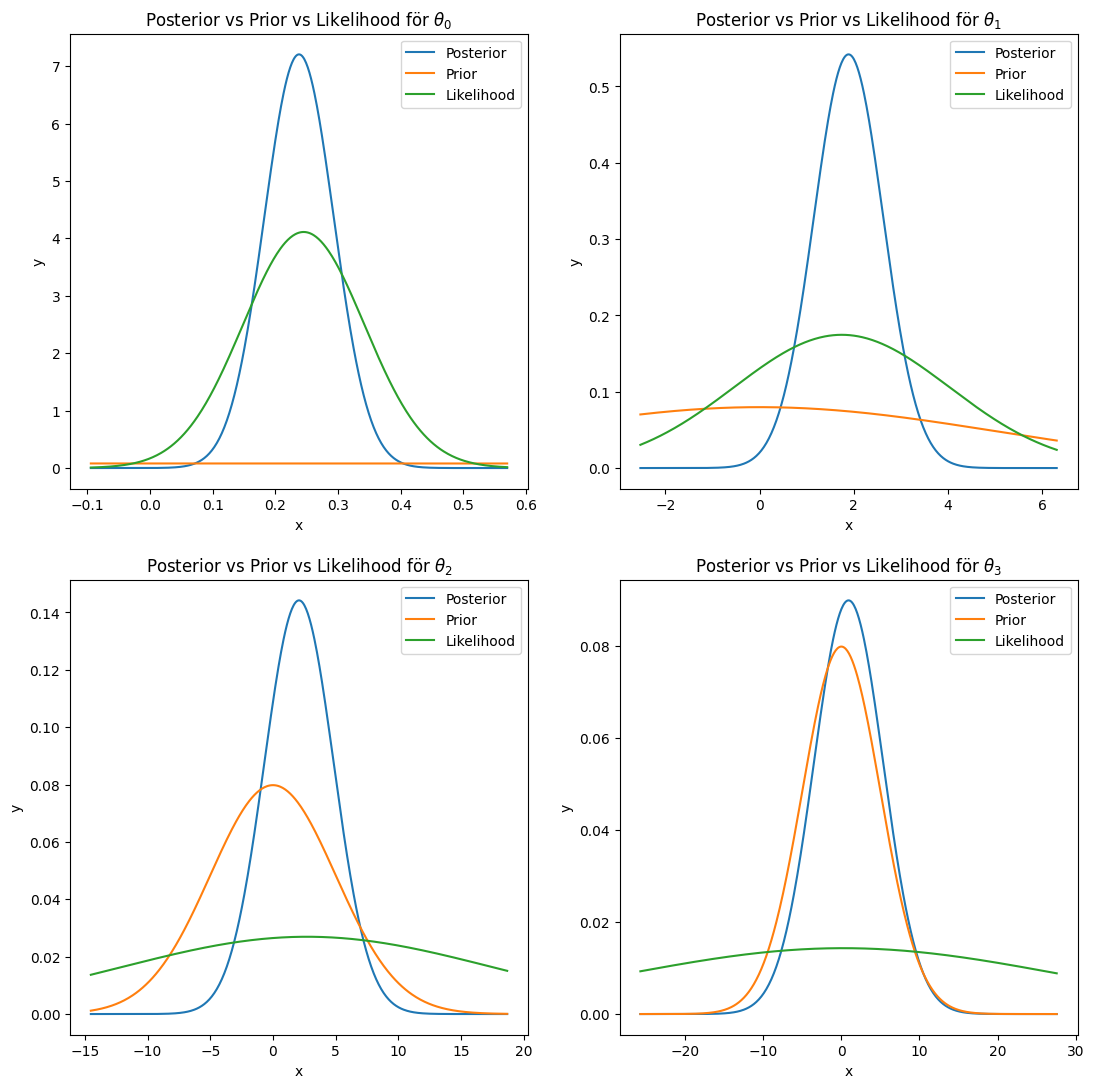

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13,13))

for i in range(4):
    ax = axs.flatten()[i]
    posterior_std = np.sqrt(results_cov[3][i, i])
    posterior_mean = results_mean[3][i]

    theta = np.linspace(posterior_mean- 6*posterior_std, posterior_mean+ 6*posterior_std, 500)

    posterior = stats.norm(loc=results_mean[3][i], scale=np.sqrt(results_cov[3][i, i]))
    prior = stats.norm(loc=0, scale=np.sqrt(sigma_theta))
    ax.plot(theta, posterior.pdf(theta), label='Posterior')
    ax.plot(theta, prior.pdf(theta), label='Prior')

    X_3 = setup_polynomial_design_matrix(x, 3)
    cov_likelihood_inv = sigma_inv(X_3, sigma_epsilon)
    cov_likelihood = np.linalg.inv(cov_likelihood_inv)
    theta_s = solve_normal_equation(X_3, d)

    likelihood = stats.norm(loc=theta_s[i], scale=np.sqrt(cov_likelihood[i,i]))
    ax.plot(theta, likelihood.pdf(theta), label='Likelihood')

    ax.set_title(r'Posterior vs Prior vs Likelihood för $\theta_{}$'.format(i))
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')


#Vi ser tydligt att posteriorn bildas av produkten mellan två normalfördelningar som är prior och liklihood. Noterbart är att 


## Steg 3

(a) Examineras i Yata

- Skapa en MCMC-sampler som bygger på Metropolisalgoritmen och som använder en normalfördelning för att föreslå nya positioner i ett $N_p$-dimensionellt rum.
- Definiera funktioner för logaritmen av a priori fördelningen samt för logaritmen av trolighetsfunktionen som tar en parameteruppsättning som argument. Ni behöver inte inkludera normaliseringskonstanter som inte beror på de parametrar som ni försöker estimera. 
- Definiera slutligen en funktion som beräknar logaritmen av (den onormaliserade) a posteriorifördelningen. 

In [9]:
X_D = setup_polynomial_design_matrix(x, 2)
sigma_prior = 5
sigma_eps = 0.05


def sampler(log_posterior_func, N_p, no_of_samples=4, start_position=None, 
            proposal_width=1., rng_seed=None):
    '''
    Metropolis sampler function for a multi-dimensional pdf.
    
    Args:
        log_posterior_func: Function 
            Function that takes `N_p` positional arguments and returns 
            the logarithm of the (possibly unnormalized) pdf.
        N_p: int
            Number of parameter dimensions
        no_of_samples: int 
            Number of samples that will be returned (including the start position). 
        start_position: array_like or None
            Start position. 
        proposal_width: float 
            Width of symmetric Gaussian proposal distribution.
        rng_seed: int or None (default None)
            Seed for the random number generator.
        
    Returns:
        ndarray (no_of_samples,N_p)
            MCMC samples
    '''
    # initialize random number generator
    rng = np.random.default_rng(seed=rng_seed)

    # starting parameter position
    if start_position==None:
        current_position = np.zeros(N_p)
    else:
        assert len(start_position)==N_p, "start_position is not correct length"
        current_position = np.asarray(start_position)
        
    # Allocate samples array with zeros, start with start_position
    # iteratively fill this array during the sampling loop
    samples = np.zeros((no_of_samples, N_p))
    samples[0] = current_position
    
    # Fixed covariance matrix
    cov = np.eye(N_p)*proposal_width**2
    
    # Sample steps
    steps = stats.multivariate_normal(np.zeros(N_p), cov).rvs(no_of_samples-1)
    
    # Sampling loop
    changed = True
    for i in range(no_of_samples-1):
        # Suggest new position
        new_position = current_position + steps[i]

        # Compute log posteriors of current and proposed position   
        if changed:  # Only recalculate current position probability if it has changed 
            p_log_current = log_posterior_func(current_position)
            changed = False
        p_log_new = log_posterior_func(new_position)
        
        # Acceptance probability
        if p_log_new-p_log_current>0:
            # Accept (A = 1)
            current_position = new_position
            changed = True
        else:
            A = np.exp(p_log_new-p_log_current)
            if A > rng.random():
                current_position = new_position
                changed = True
        # Don't update otherwise
        samples[i+1] = current_position
        
    return samples

def log_prior(theta,sigma_prior=5.):
    '''
    Logarithm of a diagonal Gaussian prior for the model parameters. Must not be properly normalized.
    
    Args:
        theta: ndarray, length `Np` 
            Array with `Np` model parameters
        sigma_prior: float (default 5.)
            Standard deviation of Gaussian prior for all parameters.
        
    Returns:
        float
            natural logarithm of the (possibly unnormalized) pdf.
    '''
    return (-1/2 * np.dot(theta, theta) / sigma_prior**2)

def log_likelihood(theta, data, X_D, sigma_eps=0.05):
    '''
    Logarithm of the normal data likelihood as a function of model parameters. Must not be properly normalized.
    
    Args:
        theta: ndarray, length `Np` 
            Array with `Np` model parameters
        data: ndarray, length `Nd`
            Array with `Nd` data instances.
        X_D:  ndarray, shape (`Nd`,`Np`)
            Design matrix for the linear model.
        sigma_eps: float (default 0.05)
            Standard deviation of Gaussian error for all data instances.
        
    Returns:
        float
            natural logarithm of the (possibly unnormalized) pdf.
    '''
    pred = np.dot(X_D, theta)
    res = (data-pred)
    return (-1/2 * np.dot(res, res) / sigma_eps**2)

def log_posterior(theta):
    return log_prior(theta, sigma_prior=sigma_prior) + log_likelihood(theta, d, X_D, sigma_eps=sigma_eps)

theta_0 = np.array([0,0,0])
theta_1 = np.array([1,1,1])


frac = log_posterior(theta_0) - log_posterior(theta_1)
print(frac)

   
    



-341.7255944471415


(b) Figur 3:

Utför en MCMC sampling av a posteriorifördelningen för den kvadratiska modellen (med tre parametrar). Visa följande marginalfördelningar, gärna i en så kallad "corner plot":

Bivariata
-  $p(\theta_0,\theta_1 \vert \mathcal{D}, I)$
-  $p(\theta_0,\theta_2 \vert \mathcal{D}, I)$
-  $p(\theta_1,\theta_2 \vert \mathcal{D}, I)$

Univariata
-  $p(\theta_0 \vert \mathcal{D}, I)$
-  $p(\theta_1 \vert \mathcal{D}, I)$
-  $p(\theta_2 \vert \mathcal{D}, I)$

Undersök hur kvaliten på dessa samplade fördelningar beror på antalet iterationer samt på bredden på normalfördelningen som används för att föreslå nya positioner. Jämför på egend hand (dessa undersökningar behöver ej redovisas i den inlämnade ipynb-filen men kan diskuteras på redovisningsseminariet):
- Hur väl jämför medelvärden och varianser med den analytiska lösningen?
- Kvaliteten på samplingen måste vara tillräckligt hög för att (åtminstone) de univariata normaldistributionerna skall kunna urskiljas.

In [10]:
iterations = int(3e6)
sampels = sampler(log_posterior, 3, no_of_samples=iterations, start_position=None, proposal_width=1)




Text(0.5, 0.98, 'MCMC-sampling iterations = 3000000')

<Figure size 600x600 with 0 Axes>

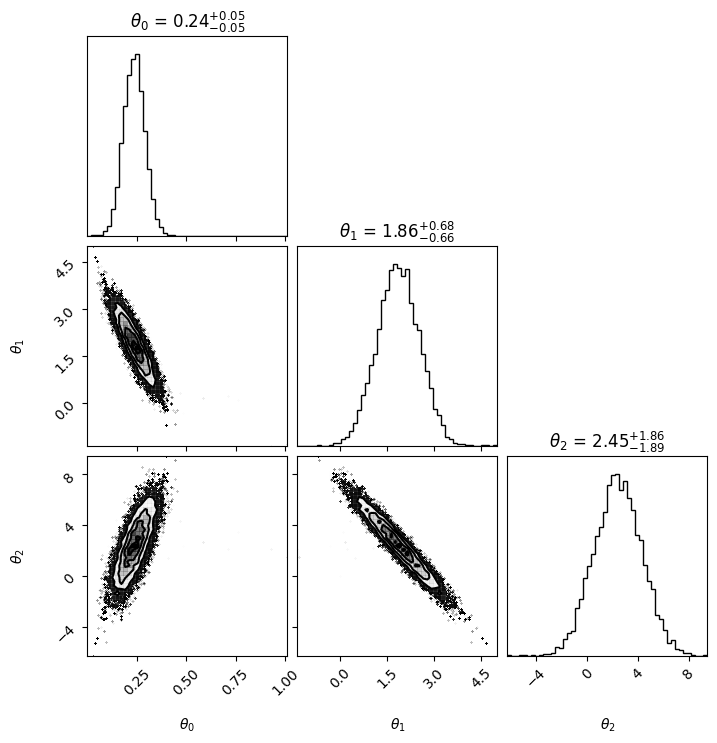

In [11]:
import corner
fig = plt.figure(figsize=(6,6))
fig.tight_layout()
corner.corner(sampels,labels = [f'$\\theta_{i}$' for i in range(3)], data_kwargs = {'alpha':0.005}, show_titles=True, bins=50)
fig.suptitle('MCMC-sampling iterations = {}'.format(iterations))


In [12]:
mean_mcmc = np.mean(sampels, axis=0)
std_mcmc = np.std(sampels, axis=0)


In [13]:

for i in range(3):
    print(r'$\theta_{}$'.format(i))
    print('Medelvärde för mcmc med {} iterationer: {:.4f}'.format(iterations, mean_mcmc[i]))
    print('Medelvärde för Bayesiansk regression {:.4f}'.format(results_mean[2][i]))
    print('Standardavvikels för mcmc med {} iterationer: {:.4f}'.format(iterations, std_mcmc[i]))
    print('Standardavvikelse för Beyesiansk regression: {:.4f}\n'.format(np.sqrt(results_cov[2][i,i])))

$\theta_0$
Medelvärde för mcmc med 3000000 iterationer: 0.2377
Medelvärde för Bayesiansk regression 0.2386
Standardavvikels för mcmc med 3000000 iterationer: 0.0531
Standardavvikelse för Beyesiansk regression: 0.0552

$\theta_1$
Medelvärde för mcmc med 3000000 iterationer: 1.8573
Medelvärde för Bayesiansk regression 1.8445
Standardavvikels för mcmc med 3000000 iterationer: 0.6696
Standardavvikelse för Beyesiansk regression: 0.7051

$\theta_2$
Medelvärde för mcmc med 3000000 iterationer: 2.4432
Medelvärde för Bayesiansk regression 2.4828
Standardavvikels för mcmc med 3000000 iterationer: 1.8613
Standardavvikelse för Beyesiansk regression: 1.9547



(c) Figur 4:

Välj cirka 100 stickprov ur den samplade fördelningen och gör en förutsägelse av funktionens utseende i intervallet $x \in [0, 0.4]$. Jämför med data samt på den underliggande funktionen. Försök dra slutsatser kring följande (dessa undersökningar behöver ej redovisas i den inlämnade ipynb-filen men kan diskuteras på redovisningsseminariet):
- Var är osäkerheten i förutsägelserna som störst?
- Med målet att den ändliga mängden med stickprov bäst skall representera den riktiga fördelningen av a posteriori förutsägelser, är det bäst att välja stickprov som kommer efter varandra i samplingen eller är det bättre att sprida ut dem?

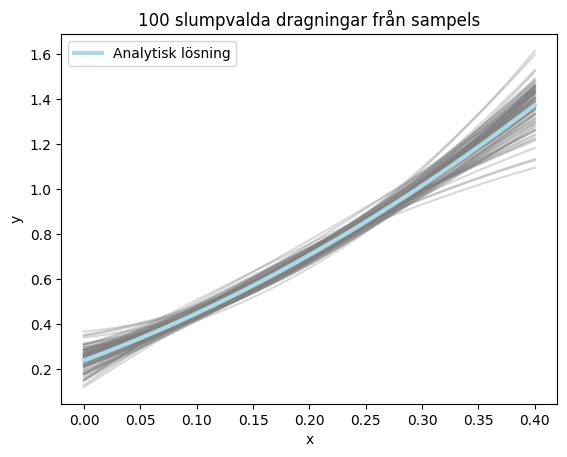

In [17]:
rng = np.random.default_rng()
random_int = rng.integers(0, sampels.shape[0], 100)
theta_random_matrix = sampels[random_int]

X = setup_polynomial_design_matrix(x, 2)
x_s = np.linspace(0, 0.4, 100)

for i in range(100):
    poly = np.poly1d(theta_random_matrix[i][::-1])
    plt.plot(x_s, poly(x_s), color='gray', alpha=0.3)

polynomial = np.poly1d(results_mean[2][::-1])
plt.plot(x_s, polynomial(x_s), color='lightblue', linewidth=3, label='Analytisk lösning')

plt.title('100 slumpvalda dragningar från sampels')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#Osäkerheten är som störst nära 0 och 0.4 då den mesta av datan ligger i mitten av intervallen och likelihooden är anpassad efter den.

#Borde vara bättre att sprida ut stickproven då man kan hamna kvar i samma punkt eller i samma delar av den multidimensinella
#fördelningen vilket kan ge en missvisande bild